In [113]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, accuracy_score, recall_score, ConfusionMatrixDisplay

# Import Dataset

In [114]:
# Defining the column names or features according to the dataset
column_names = ['age', 'workclass','fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Salary']

# Reading and importig the dataset with column names
df = pd.read_csv('adult.data', names=column_names)

In [115]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Preprocessing

In [116]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [117]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [119]:
# Setting the target (dependent) variable Salary to 1 or 0(binary)
# as it only contains ' >50K' and '<=50K'
df['Salary'] = np.where((df['Salary']==' >50K'),1,0)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [120]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Salary          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


# Splitting of dataset

In [122]:
# Shuffling of data
df = df.sample(frac=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
4193,21,Private,370990,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,0
10738,36,Private,290409,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
31065,52,Local-gov,153312,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
8693,45,Private,226246,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
23872,57,State-gov,183657,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,35,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23845,47,Private,185041,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,1
12916,19,Private,279968,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,0
24207,39,Private,278557,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1628,48,United-States,0
3930,20,Private,400443,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,0


In [123]:
# splitting of training and testing data
# 70% => training data and 30% => testing data
separating_index = int(len(df)*0.7)
train_data = df[:separating_index]
test_data = df[separating_index:]

# For training Data

In [124]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
4193,21,Private,370990,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,0
10738,36,Private,290409,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
31065,52,Local-gov,153312,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
8693,45,Private,226246,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
23872,57,State-gov,183657,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,35,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,25,Private,254746,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,0
15241,40,Private,220563,12th,8,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
26981,41,Private,149909,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1848,40,United-States,1
24761,54,Private,220055,Bachelors,13,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States,0


# Missing Value Handling

In [125]:
# check unique values for every features
for i in train_data.columns:
    print("For", i)
    print(train_data[i].unique())

For age
[21 36 52 45 57 34 18 43 29 28 20 48 59 62 42 33 46 38 41 19 39 37 49 50
 64 23 35 25 32 51 26 27 30 68 47 31 63 44 24 40 66 84 56 22 90 53 61 17
 55 58 72 67 75 54 70 60 65 80 71 82 77 69 76 73 78 83 81 79 85 74 88]
For workclass
[' Private' ' Local-gov' ' State-gov' ' Self-emp-inc' ' Federal-gov'
 ' Self-emp-not-inc' ' ?' ' Without-pay' ' Never-worked']
For fnlwgt
[370990 290409 153312 ... 209826 156953 220055]
For education
[' Some-college' ' Assoc-acdm' ' HS-grad' ' 11th' ' Masters' ' Assoc-voc'
 ' Bachelors' ' 7th-8th' ' 10th' ' 12th' ' Prof-school' ' 9th'
 ' Doctorate' ' 1st-4th' ' 5th-6th' ' Preschool']
For education-num
[10 12  9  7 14 11 13  4  6  8 15  5 16  2  3  1]
For marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse']
For occupation
[' Sales' ' Transport-moving' ' Protective-serv' ' Handlers-cleaners'
 ' Prof-specialty' ' Other-service' ' Exec-managerial' ' Adm-clerical'
 ' Mach

In [126]:
# checking for null or NaN values
null_values_count = list(train_data.isnull().sum())
print(null_values_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [127]:
# checking the column workclass for '?'
print(train_data['workclass'].value_counts())

 Private             15911
 Self-emp-not-inc     1746
 Local-gov            1466
 ?                    1296
 State-gov             904
 Self-emp-inc          786
 Federal-gov           667
 Without-pay            12
 Never-worked            4
Name: workclass, dtype: int64


In [128]:
# dropping the data with ' ?' values in workclass
sum(train_data['workclass'].values==' ?')


1296

In [129]:
droplist=train_data.loc[train_data['workclass']==' ?'].index.tolist()

In [130]:
train_data.drop(droplist,axis=0,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\915805065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(droplist,axis=0,inplace=True)


In [131]:
# Final checking the column workclass for '?'
print(train_data['workclass'].value_counts())

 Private             15911
 Self-emp-not-inc     1746
 Local-gov            1466
 State-gov             904
 Self-emp-inc          786
 Federal-gov           667
 Without-pay            12
 Never-worked            4
Name: workclass, dtype: int64


In [138]:
# checking the column occupation for '?'
print(train_data['occupation'].value_counts())

 Prof-specialty       2804
 Craft-repair         2803
 Exec-managerial      2728
 Adm-clerical         2610
 Sales                2527
 Other-service        2254
 Machine-op-inspct    1411
 Transport-moving     1097
 Handlers-cleaners     968
 Farming-fishing       716
 Tech-support          644
 Protective-serv       444
 Priv-house-serv        89
 Armed-Forces            3
Name: occupation, dtype: int64


In [134]:
# dropping the data with ' ?' values in occupation
sum(train_data['occupation'].values==' ?')
droplist=train_data.loc[train_data['occupation']==' ?'].index.tolist()
train_data.drop(droplist,axis=0,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3403245018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(droplist,axis=0,inplace=True)


In [139]:
# Final checking the column occupation for '?'
print(train_data['occupation'].value_counts())

 Prof-specialty       2804
 Craft-repair         2803
 Exec-managerial      2728
 Adm-clerical         2610
 Sales                2527
 Other-service        2254
 Machine-op-inspct    1411
 Transport-moving     1097
 Handlers-cleaners     968
 Farming-fishing       716
 Tech-support          644
 Protective-serv       444
 Priv-house-serv        89
 Armed-Forces            3
Name: occupation, dtype: int64


In [132]:
# checking the column native-country for '?'
print(train_data['native-country'].value_counts())

 United-States                 19229
 Mexico                          433
 ?                               394
 Philippines                     119
 Germany                          91
 Canada                           86
 El-Salvador                      77
 Puerto-Rico                      74
 India                            65
 Cuba                             64
 Jamaica                          60
 England                          59
 Dominican-Republic               51
 South                            50
 Italy                            48
 Guatemala                        45
 China                            45
 Vietnam                          44
 Columbia                         41
 Japan                            40
 Poland                           39
 Haiti                            33
 Taiwan                           30
 Nicaragua                        25
 Iran                             25
 Portugal                         24
 Peru                             24
 

In [136]:
# dropping the data with ' ?' values in native-country
sum(train_data['native-country'].values==' ?')
droplist=train_data.loc[train_data['native-country']==' ?'].index.tolist()
train_data.drop(droplist,axis=0,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\128660823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(droplist,axis=0,inplace=True)


In [137]:
# Final checking the column native-country for '?'
print(train_data['native-country'].value_counts())

 United-States                 19225
 Mexico                          433
 Philippines                     119
 Germany                          91
 Canada                           86
 El-Salvador                      77
 Puerto-Rico                      74
 India                            65
 Cuba                             64
 Jamaica                          60
 England                          59
 Dominican-Republic               51
 South                            50
 Italy                            48
 Guatemala                        45
 China                            45
 Vietnam                          44
 Columbia                         41
 Japan                            40
 Poland                           39
 Haiti                            33
 Taiwan                           30
 Nicaragua                        25
 Iran                             25
 Portugal                         24
 Peru                             24
 Greece                           19
 

In [140]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21098 entries, 4193 to 22053
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             21098 non-null  int64 
 1   workclass       21098 non-null  object
 2   fnlwgt          21098 non-null  int64 
 3   education       21098 non-null  object
 4   education-num   21098 non-null  int64 
 5   marital-status  21098 non-null  object
 6   occupation      21098 non-null  object
 7   relationship    21098 non-null  object
 8   race            21098 non-null  object
 9   sex             21098 non-null  object
 10  capital-gain    21098 non-null  int64 
 11  capital-loss    21098 non-null  int64 
 12  hours-per-week  21098 non-null  int64 
 13  native-country  21098 non-null  object
 14  Salary          21098 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 2.5+ MB


In [141]:
# Checking for duplicate values
train_data.duplicated().sum()

14

In [142]:
# getting the indexes of the duplicate values
droplist=train_data.loc[train_data.duplicated()==True].index.tolist()
droplist

[16297,
 29157,
 4881,
 25872,
 21490,
 8080,
 22367,
 21875,
 17673,
 30845,
 28230,
 2303,
 8679,
 25624]

In [143]:
# Deleting the duplicate values
train_data.drop(droplist,axis=0,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\887626969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(droplist,axis=0,inplace=True)


In [144]:
# Checking for duplicate values
train_data.duplicated().sum()

0

In [145]:
train_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

# Converting categorical features to numerical

In [146]:
# getting categorical columns using datatypes
categorical_columns = [df.columns[i] for i in range(len(df.dtypes)) if (df.dtypes[i]=='object')]

In [147]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [148]:
# getting numerical columns using datatypes
numerical_columns = [df.columns[i] for i in range(len(df.dtypes)) if (df.dtypes[i]=='int64' or df.dtypes[i]=='int32')]

In [149]:
numerical_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'Salary']

In [150]:
# setting encoder for categorical columns
label_encoder = preprocessing.LabelEncoder()

In [151]:
# categorical to numerical converter
for cl in categorical_columns:
    label_encoder.fit(train_data[cl])
    train_data[cl] = label_encoder.transform(train_data[cl])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3096014955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[cl] = label_encoder.transform(train_data[cl])


In [152]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
4193,21,2,370990,15,10,4,11,3,4,1,0,0,40,38,0
10738,36,2,290409,15,10,2,13,0,4,1,0,0,40,38,0
31065,52,1,153312,7,12,2,10,0,4,1,0,0,40,38,1
8693,45,2,226246,11,9,0,5,1,4,1,0,0,50,38,0
23872,57,5,183657,15,10,2,9,0,2,1,0,0,35,38,1


#  Outlier removal using Median-IQR

In [36]:
# reindexing the dataset and deleting the previous index
train_data.reset_index(inplace=True)
train_data.drop('index', axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3812267464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('index', axis=1, inplace=True)


# Data dispersion visualization for Outlier detection

In [37]:
# Data dispersion visualization for std and IQR
def data_dispersion_visualization(dataset, ef):
    # histogram plot
    sns.set(style="darkgrid")
    dataset[ef].hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
    plt.show()
    # Boxplot to check for outliers
    sns.boxplot(x=ef, data=dataset)
    plt.show()

For Feature  age


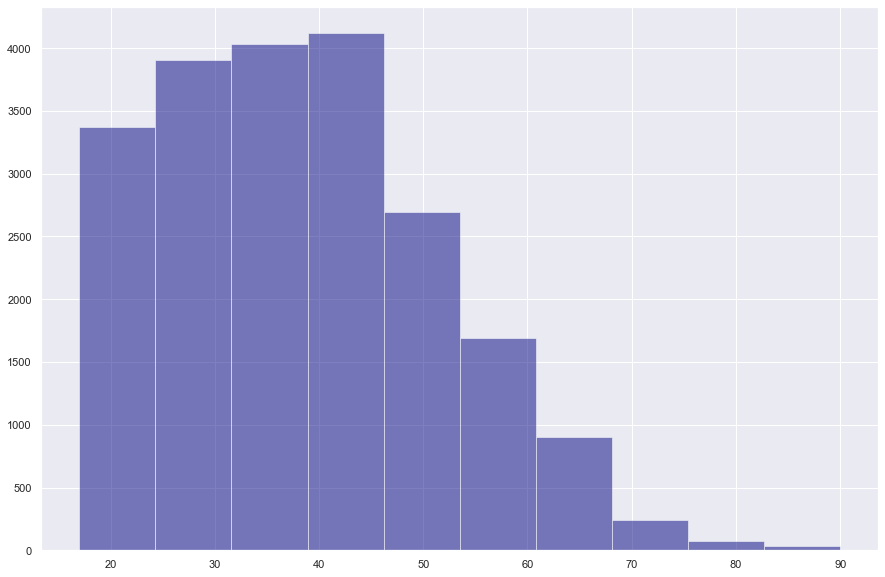

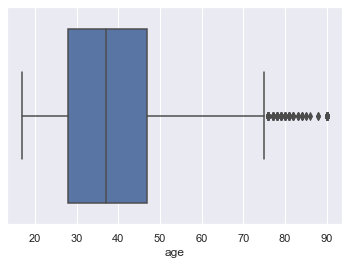

For Feature  workclass


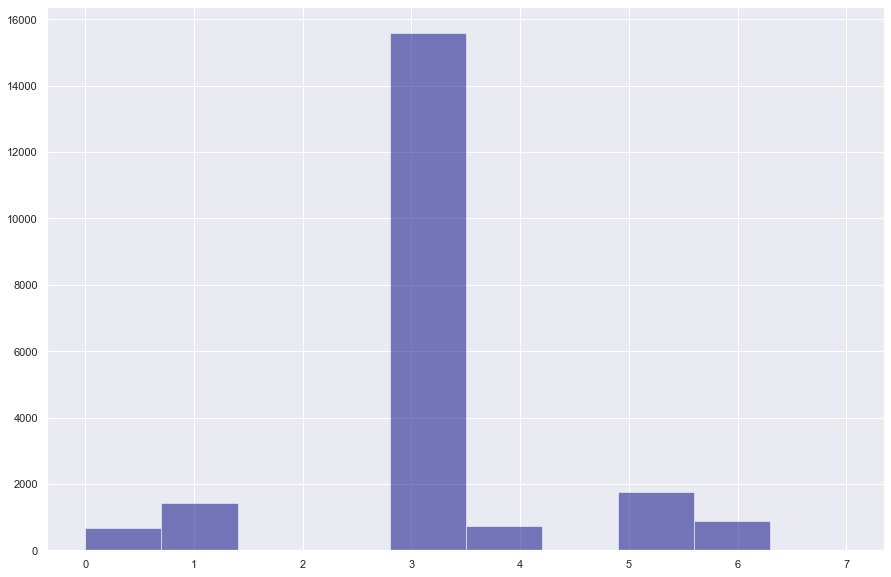

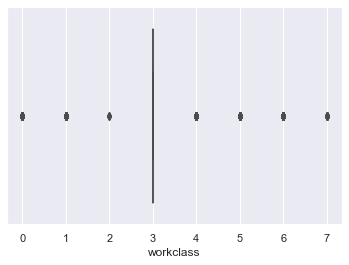

For Feature  fnlwgt


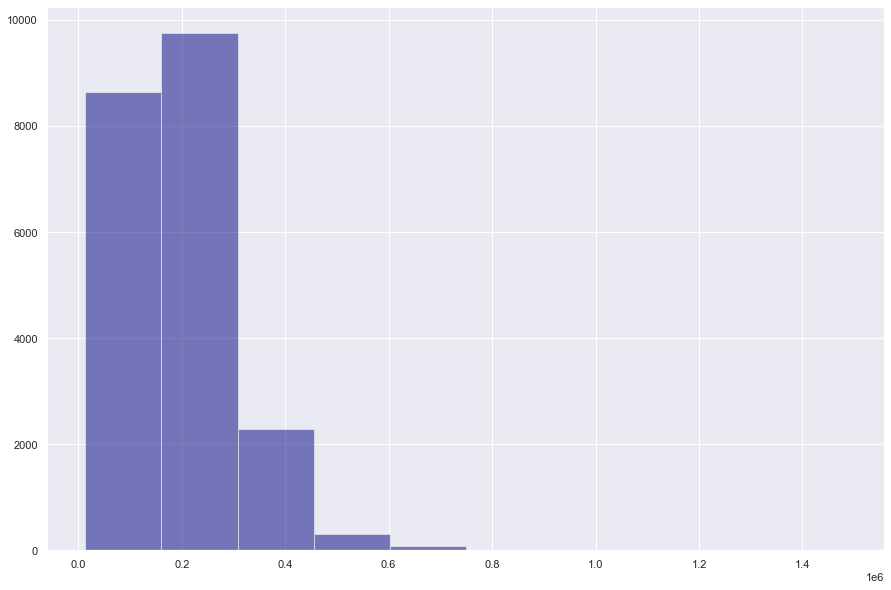

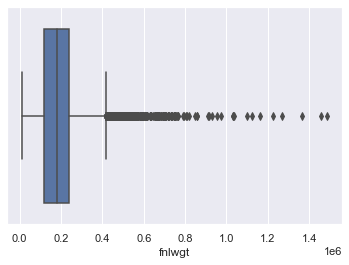

For Feature  education


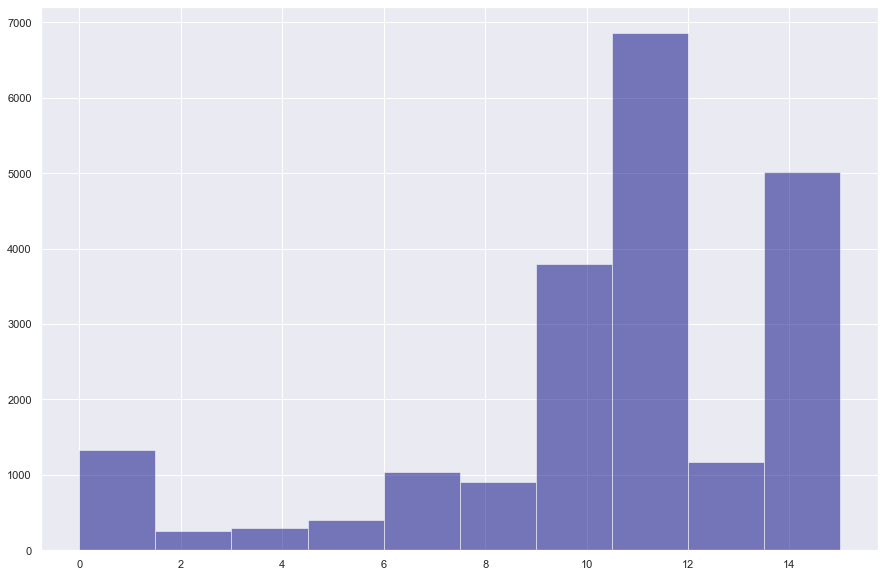

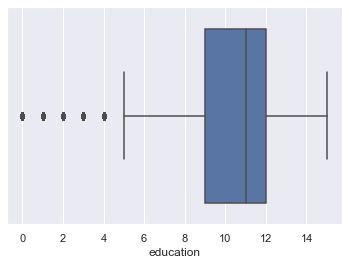

For Feature  education-num


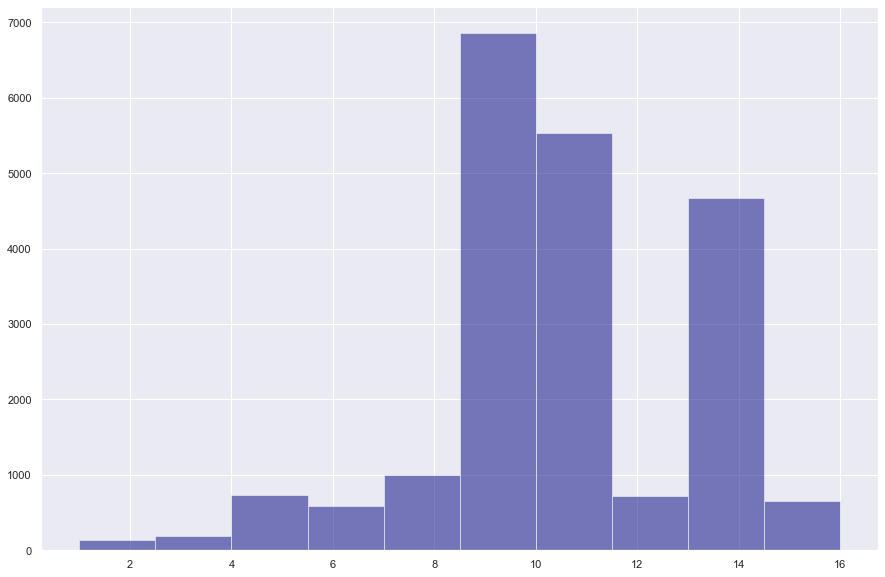

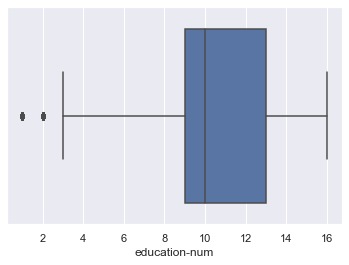

For Feature  marital-status


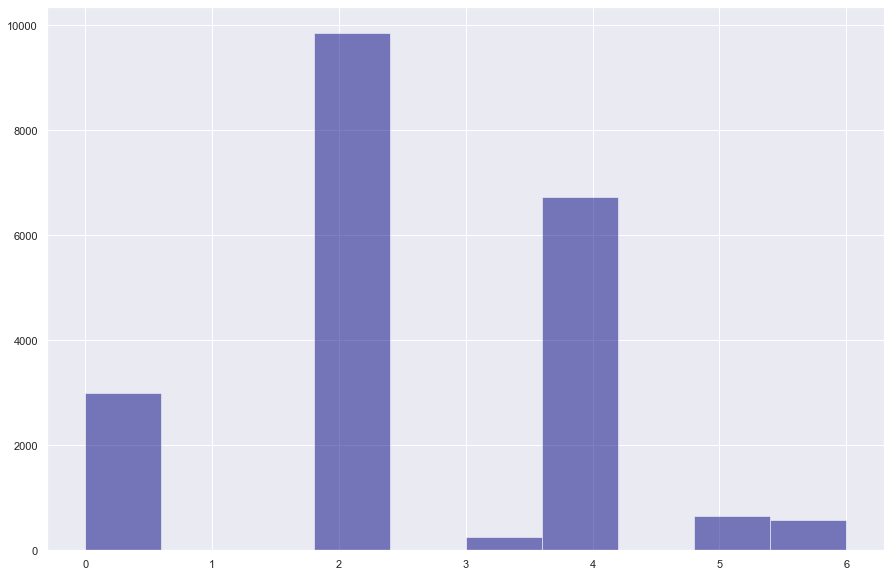

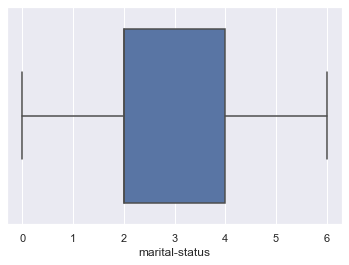

For Feature  occupation


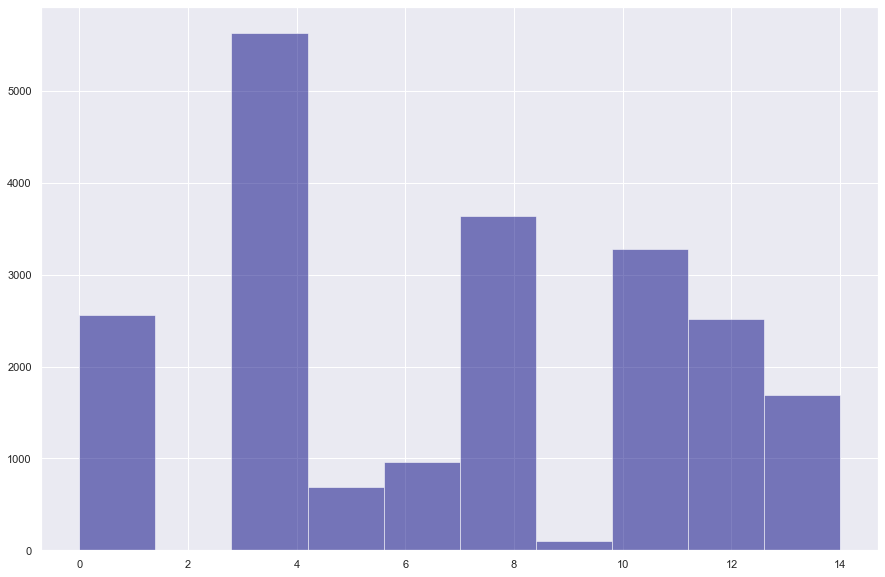

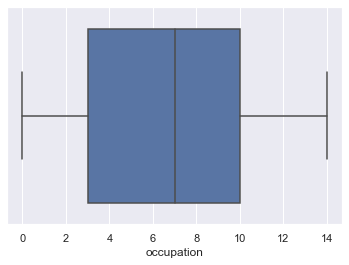

For Feature  relationship


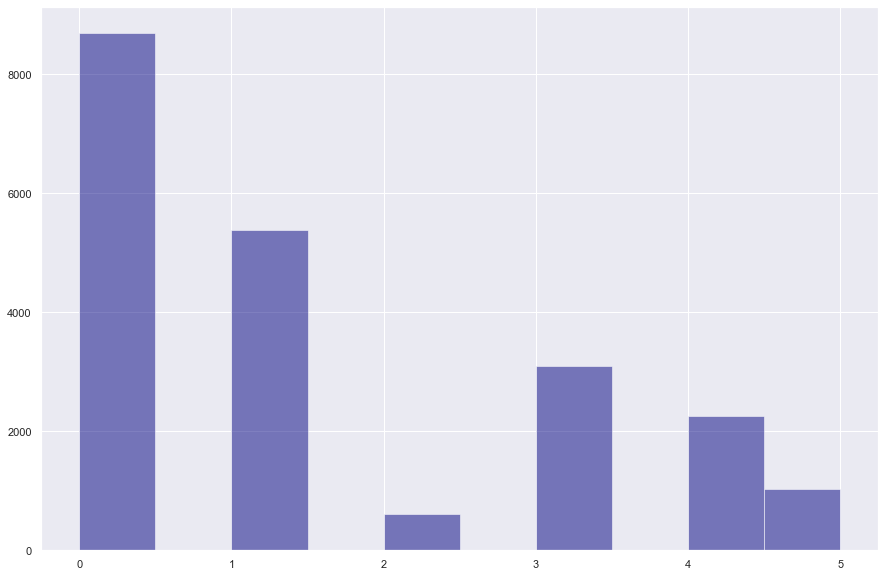

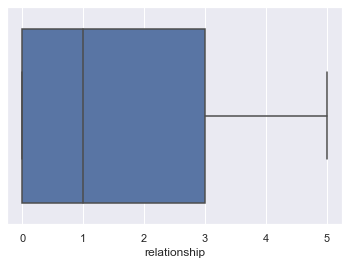

For Feature  race


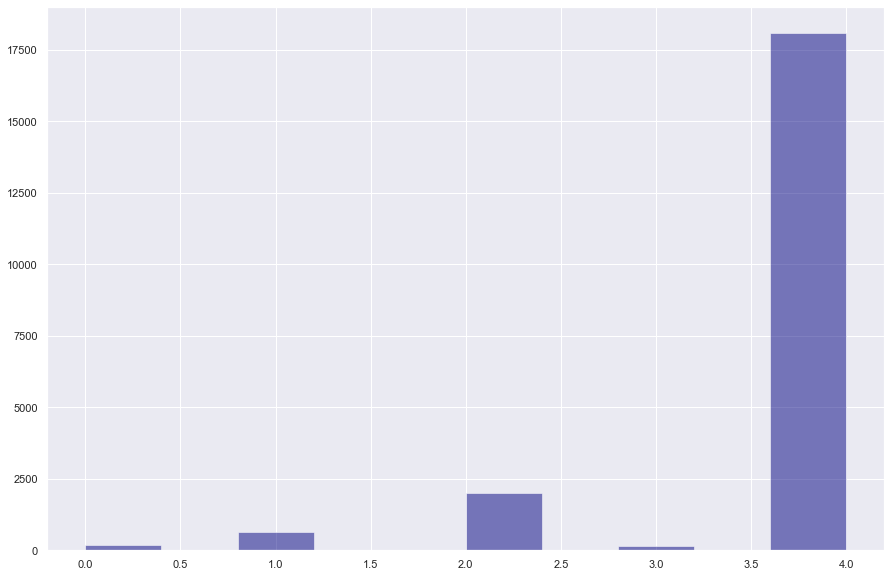

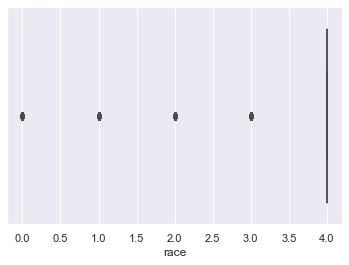

For Feature  sex


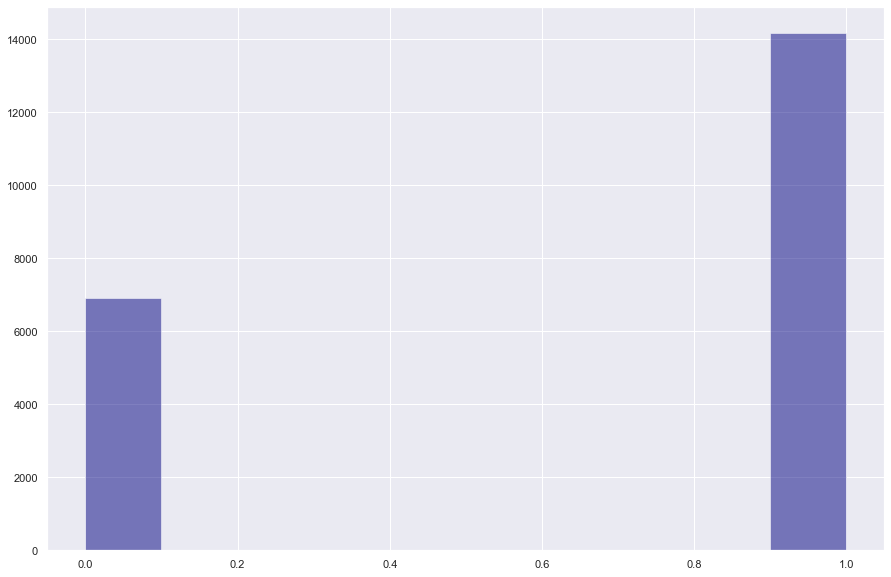

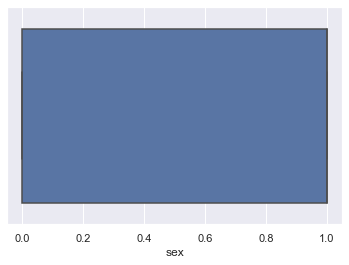

For Feature  capital-gain


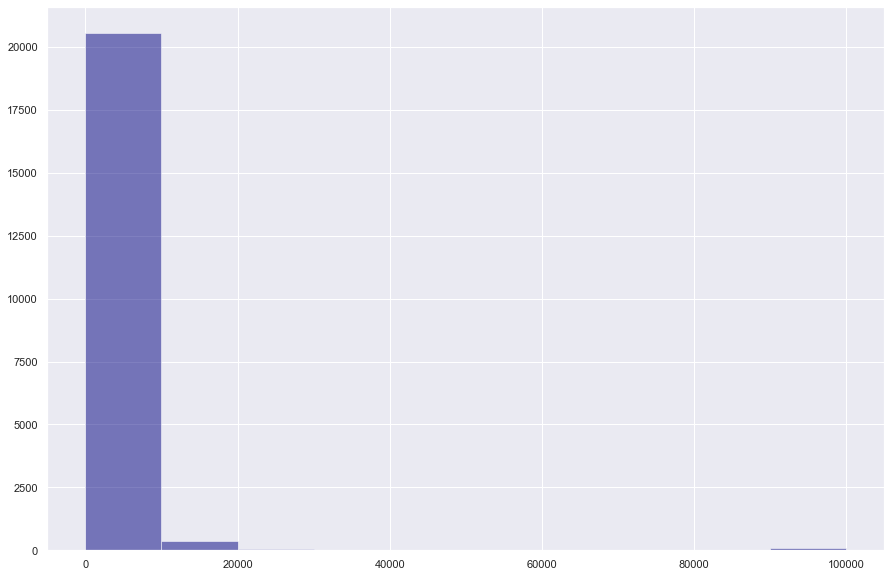

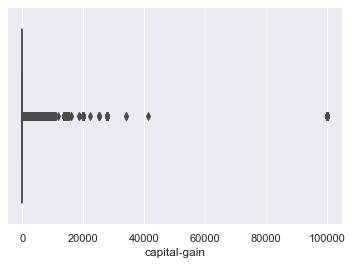

For Feature  capital-loss


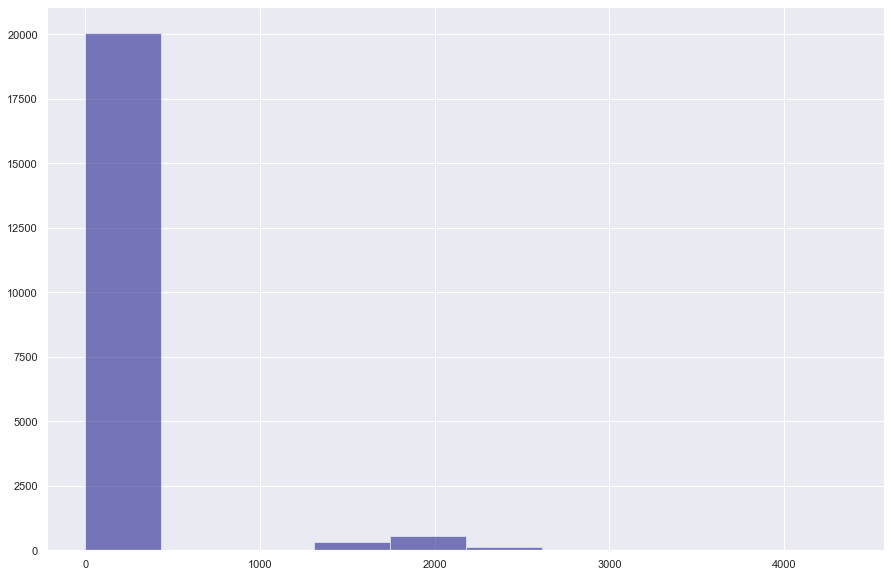

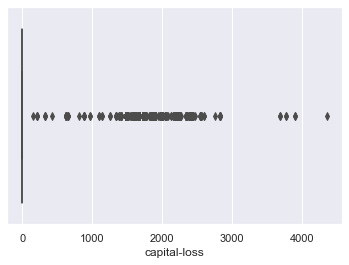

For Feature  hours-per-week


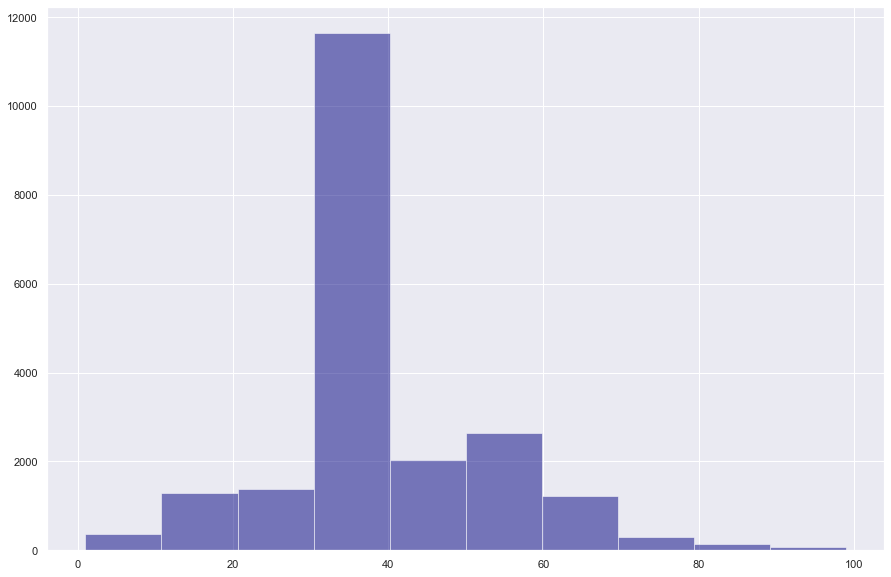

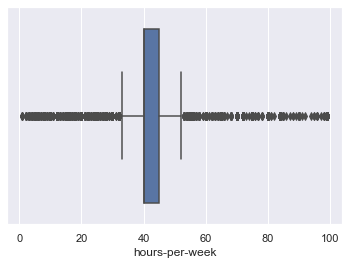

For Feature  native-country


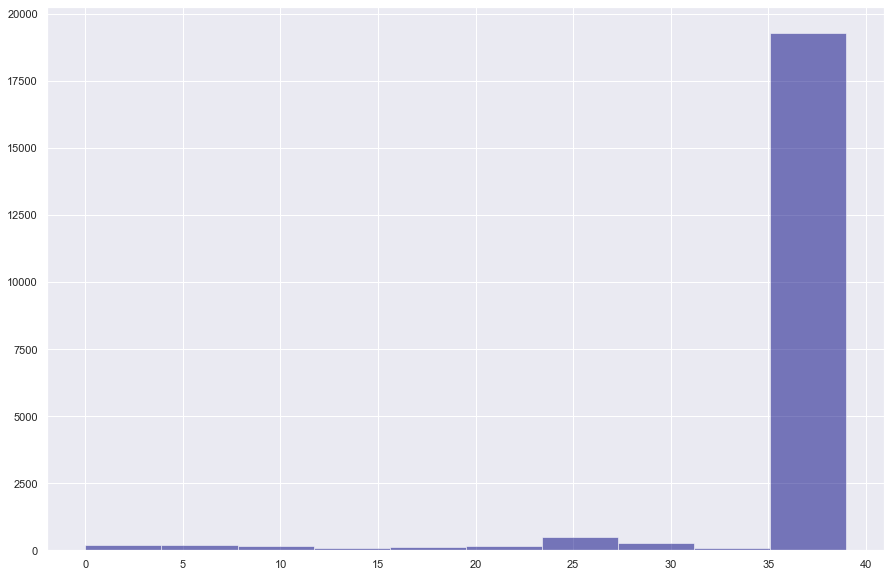

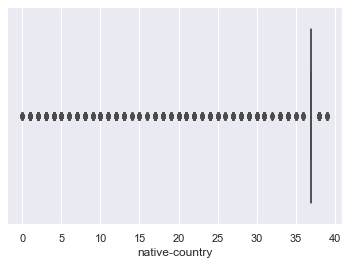

For Feature  Salary


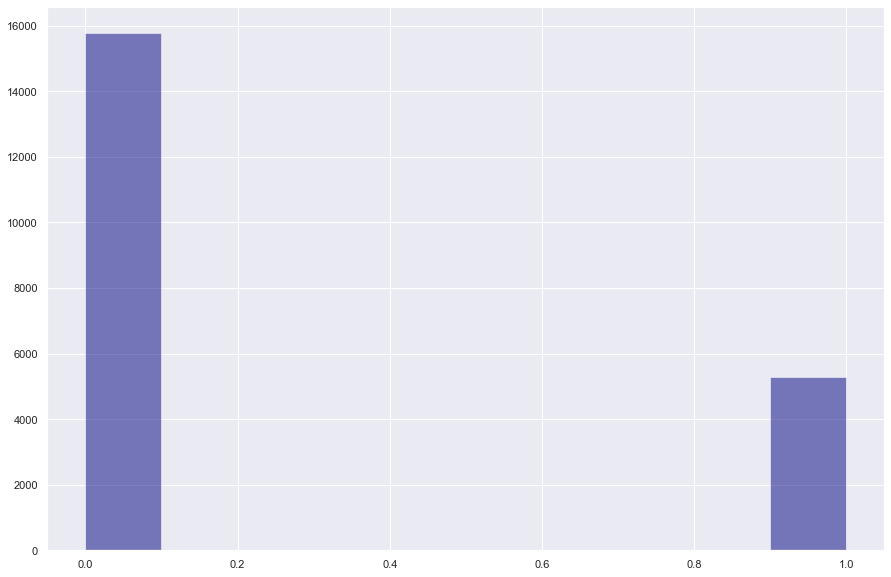

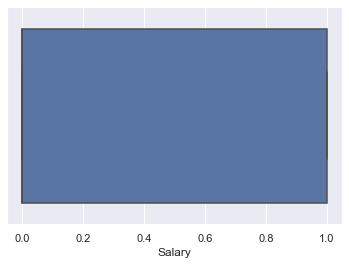

In [38]:
for ef in train_data.columns:
    print("For Feature ", ef)
    data_dispersion_visualization(train_data, ef)

In [39]:
# Outlier removal using Median-IQR
def find_median(data):
    sorted_list = sorted(data)
    indices = []
    n = len(sorted_list)

    if (n%2 == 0):
        indices.append(int(n/2) -1)
        indices.append(int(n/2))

        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) /2
    else:
        indices.append(int(n/2))
        median = sorted_list[indices[0]]
    return median, indices
    
def get_quartile(samples):
    median, median_indices = find_median(samples)

    if(len(median_indices)==1):
        Q1, Q1_indices = find_median(samples[:median_indices[0]])
        Q3, Q3_indices = find_median(samples[median_indices[0]+1:])
    else:
        Q1, Q1_indices = find_median(samples[:median_indices[0]+1])
        Q3, Q3_indices = find_median(samples[median_indices[-1]:])

    quartiles = [Q1, median, Q3]
    return quartiles
    
def detect_outlier(samples):
    outliers = []
    
    quartiles = get_quartile(samples)
    Q1 = quartiles[0]
    Q3 = quartiles[-1]
    IQR = Q3 - Q1
    outlierConstant = 1.5

    OLB = Q1 - (IQR * outlierConstant)
    OUB = Q3 + (IQR * outlierConstant)

    for i in range(len(samples)):
        a = []
        if((samples[i] < OLB) | (samples[i] > OUB)):
            outliers.append(samples[i])
           
            
       

    return outliers

In [40]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,19,6,431745,1,7,4,8,3,4,1,0,0,30,37,0
1,67,5,127543,0,6,2,5,0,4,1,2414,0,80,37,0
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
4,24,3,585203,9,13,2,4,5,4,0,7688,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0
21083,18,3,173255,11,9,4,14,3,4,1,1055,0,25,37,0
21084,46,3,102569,12,14,2,4,0,4,1,15024,0,65,37,1


# Outlier removal of age feature

In [41]:
# sorted age data
age_data = np.sort(train_data['age'])
age_data

array([17, 17, 17, ..., 90, 90, 90], dtype=int64)

In [42]:
# detecting outliers
outliers = detect_outlier(age_data)

In [43]:
# deleting outliers
for each_outlier in outliers:
    outlier_index = train_data.loc[train_data['age'] == each_outlier].index.tolist()
    train_data.drop(outlier_index, axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2544865967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [44]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,19,6,431745,1,7,4,8,3,4,1,0,0,30,37,0
1,67,5,127543,0,6,2,5,0,4,1,2414,0,80,37,0
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
4,24,3,585203,9,13,2,4,5,4,0,7688,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0
21083,18,3,173255,11,9,4,14,3,4,1,1055,0,25,37,0
21084,46,3,102569,12,14,2,4,0,4,1,15024,0,65,37,1


# Outlier removal of education-num feature

In [45]:
# sorted education-num data
education_num_data = np.sort(train_data['education-num'])
education_num_data

array([ 1,  1,  1, ..., 16, 16, 16], dtype=int64)

In [46]:
# detection of outliers
outliers = detect_outlier(education_num_data)

In [47]:
# deletion of outliers
for each_outlier in outliers:
    outlier_index = train_data.loc[train_data['education-num'] == each_outlier].index.tolist()
    train_data.drop(outlier_index, axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4070813440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [48]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,19,6,431745,1,7,4,8,3,4,1,0,0,30,37,0
1,67,5,127543,0,6,2,5,0,4,1,2414,0,80,37,0
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
4,24,3,585203,9,13,2,4,5,4,0,7688,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0
21083,18,3,173255,11,9,4,14,3,4,1,1055,0,25,37,0
21084,46,3,102569,12,14,2,4,0,4,1,15024,0,65,37,1


# Outlier removal of fnlwgt feature

In [49]:
# sorting of fnlwgt data
fnlwgt_data = np.sort(train_data['fnlwgt'])
fnlwgt_data

array([  13769,   19214,   19302, ..., 1366120, 1455435, 1484705],
      dtype=int64)

In [50]:
# detecting outliers
outliers = detect_outlier(fnlwgt_data)

In [51]:
# deleting outliers
for each_outlier in outliers:
    outlier_index = train_data.loc[train_data['fnlwgt'] == each_outlier].index.tolist()
    train_data.drop(outlier_index, axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1968751465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [52]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
1,67,5,127543,0,6,2,5,0,4,1,2414,0,80,37,0
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
5,62,7,159908,15,10,2,1,5,4,0,0,0,16,37,0
6,30,3,217296,8,11,2,1,5,4,0,0,0,35,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0
21083,18,3,173255,11,9,4,14,3,4,1,1055,0,25,37,0
21084,46,3,102569,12,14,2,4,0,4,1,15024,0,65,37,1


# Outlier removal of feature capital-gain

In [53]:
# sorting of capital-gain data
capital_gain_data = np.sort(train_data['capital-gain'])
capital_gain_data

array([    0,     0,     0, ..., 99999, 99999, 99999], dtype=int64)

In [54]:
# detecting outliers
outliers = detect_outlier(capital_gain_data)

In [55]:
# deleting outliers
for each_outlier in outliers:
    outlier_index = train_data.loc[train_data['capital-gain'] == each_outlier].index.tolist()
    train_data.drop(outlier_index, axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\1292849839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [56]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
5,62,7,159908,15,10,2,1,5,4,0,0,0,16,37,0
6,30,3,217296,8,11,2,1,5,4,0,0,0,35,37,0
7,29,3,130045,5,4,2,8,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,30,1,233993,9,13,4,10,3,4,0,0,0,15,37,0
21080,37,3,65390,9,13,2,5,0,4,1,0,0,50,37,0
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0


# Outlier removal using Mean-SDV

In [57]:
# Outlier removal using Mean-SDV
def detect_outliers2(data):
    mean = np.mean(data)
    std = np.std(data)
    boundary = [mean - 3*std, mean + 3*std]
    outliers = []
    for ea in data:
        if ea < boundary[0] or ea > boundary[1]:
            outliers.append(ea)
        
    return outliers


# Outlier removal for feature capital-loss

In [59]:
# sorting of capital-loss data
capital_loss_data = np.sort(train_data['capital-loss'])
capital_loss_data

array([   0,    0,    0, ..., 3770, 3900, 3900], dtype=int64)

In [60]:
# detecting outliers
outliers = detect_outliers2(capital_loss_data)

In [61]:
# deleting outliers
for each_outlier in outliers:
    outlier_index = train_data.loc[train_data['capital-loss'] == each_outlier].index.tolist()
    train_data.drop(outlier_index, axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2453819837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [62]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
5,62,7,159908,15,10,2,1,5,4,0,0,0,16,37,0
6,30,3,217296,8,11,2,1,5,4,0,0,0,35,37,0
7,29,3,130045,5,4,2,8,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,30,1,233993,9,13,4,10,3,4,0,0,0,15,37,0
21080,37,3,65390,9,13,2,5,0,4,1,0,0,50,37,0
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0


# Outlier removal of feature hours-per-week

In [63]:
# sorting hours-per-week data
hours_per_week_data = np.sort(train_data['hours-per-week'])
hours_per_week_data

array([ 1,  1,  1, ..., 99, 99, 99], dtype=int64)

In [64]:
# detecting outliers
outliers = detect_outliers2(hours_per_week_data)

In [65]:
# deleting outliers
for each_outlier in outliers:
    outlier_index = train_data.loc[train_data['hours-per-week'] == each_outlier].index.tolist()
    train_data.drop(outlier_index, axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3319813292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [66]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
5,62,7,159908,15,10,2,1,5,4,0,0,0,16,37,0
6,30,3,217296,8,11,2,1,5,4,0,0,0,35,37,0
7,29,3,130045,5,4,2,8,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,30,1,233993,9,13,4,10,3,4,0,0,0,15,37,0
21080,37,3,65390,9,13,2,5,0,4,1,0,0,50,37,0
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0


In [67]:
# sorting education-num data
education_num_data = np.sort(train_data['education-num'])
education_num_data

array([ 3,  3,  3, ..., 16, 16, 16], dtype=int64)

In [68]:
# detecting outliers
outliers = detect_outliers2(education_num_data)

In [70]:
# deleting outliers
for each_outlier in outliers:
    outlier_index = train_data.loc[train_data['education-num'] == each_outlier].index.tolist()
    train_data.drop(outlier_index, axis=0, inplace=True)

In [71]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
5,62,7,159908,15,10,2,1,5,4,0,0,0,16,37,0
6,30,3,217296,8,11,2,1,5,4,0,0,0,35,37,0
7,29,3,130045,5,4,2,8,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,30,1,233993,9,13,4,10,3,4,0,0,0,15,37,0
21080,37,3,65390,9,13,2,5,0,4,1,0,0,50,37,0
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0


# Feature Selection and Feature Pruning

In [72]:
# calculating correlation between the features
cormat = train_data.corr()
round(cormat, 2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
age,1.00,0.04,-0.07,-0.00,0.03,-0.30,0.00,-0.25,0.02,0.07,NaN,0.02,0.14,-0.00,0.23
workclass,0.04,1.00,-0.02,0.00,-0.00,-0.02,0.01,-0.06,0.05,0.07,NaN,-0.02,0.02,-0.01,-0.02
fnlwgt,-0.07,-0.02,1.00,-0.01,-0.04,0.04,-0.01,0.02,-0.01,0.02,NaN,-0.00,-0.02,-0.06,-0.01
education,-0.00,0.00,-0.01,1.00,0.35,-0.03,-0.04,-0.02,0.01,-0.03,NaN,-0.01,0.06,0.06,0.07
education-num,0.03,-0.00,-0.04,0.35,1.00,-0.04,0.08,-0.09,0.03,-0.00,NaN,0.01,0.14,0.05,0.30
marital-status,-0.30,-0.02,0.04,-0.03,-0.04,1.00,0.02,0.17,-0.07,-0.11,NaN,-0.02,-0.19,-0.02,-0.18
occupation,0.00,0.01,-0.01,-0.04,0.08,0.02,1.00,-0.05,0.01,0.07,NaN,0.01,0.01,-0.00,0.05
relationship,-0.25,-0.06,0.02,-0.02,-0.09,0.17,-0.05,1.00,-0.12,-0.57,NaN,0.04,-0.27,-0.01,-0.23
race,0.02,0.05,-0.01,0.01,0.03,-0.07,0.01,-0.12,1.00,0.09,NaN,0.01,0.06,0.13,0.07
sex,0.07,0.07,0.02,-0.03,-0.00,-0.11,0.07,-0.57,0.09,1.00,NaN,-0.03,0.23,-0.00,0.20


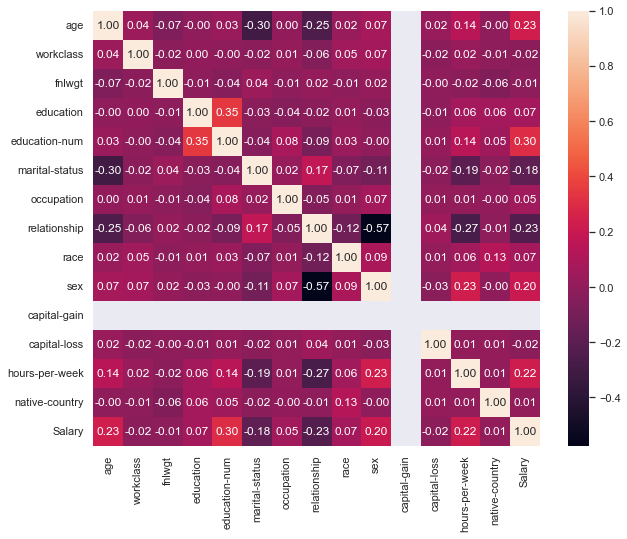

In [73]:
# Displaying the heatmap of correlation between the features
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.heatmap(cormat, annot = True, fmt='.2f')

In [74]:
# taking 20% correlation as our threshold and selecting the features
features = ['age', 'education-num', 'sex', 'hours-per-week']

# separating the dependent and independent variable as target and dataset
y_train = train_data['Salary']
X_train = train_data[features]

# Data Visualization

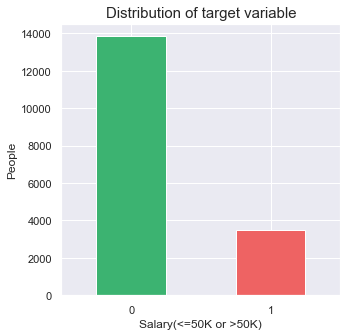

In [75]:
sns.set(style="darkgrid")
train_data.Salary.value_counts().plot(kind="bar",figsize=(5,5),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=15)
plt.xlabel('Salary(<=50K or >50K)',fontsize=12)
plt.ylabel('People',fontsize=12)
plt.xticks(rotation=0)
plt.show()

1    11311
0     6016
Name: sex, dtype: int64


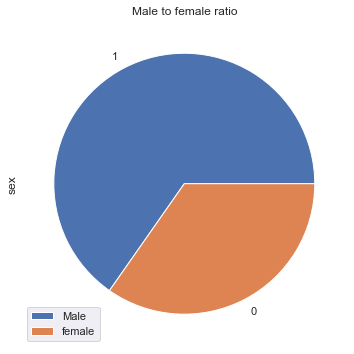

In [76]:
# Gender and its correlation with Salary

print (train_data['sex'].value_counts())
train_data['sex'].value_counts().plot(kind = 'pie', figsize = (8,6))
plt.title('Male to female ratio')
plt.legend(['Male','female'])

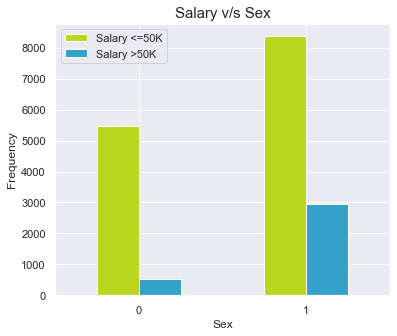

In [77]:
sns.set(style="darkgrid")
pd.crosstab(train_data.sex,train_data.Salary).plot(kind="bar",figsize=(6,5),color=['#BAD720',"#33A1C9"])
plt.title('Salary v/s Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Salary <=50K", "Salary >50K"])
plt.ylabel('Frequency',fontsize=12)
plt.show()

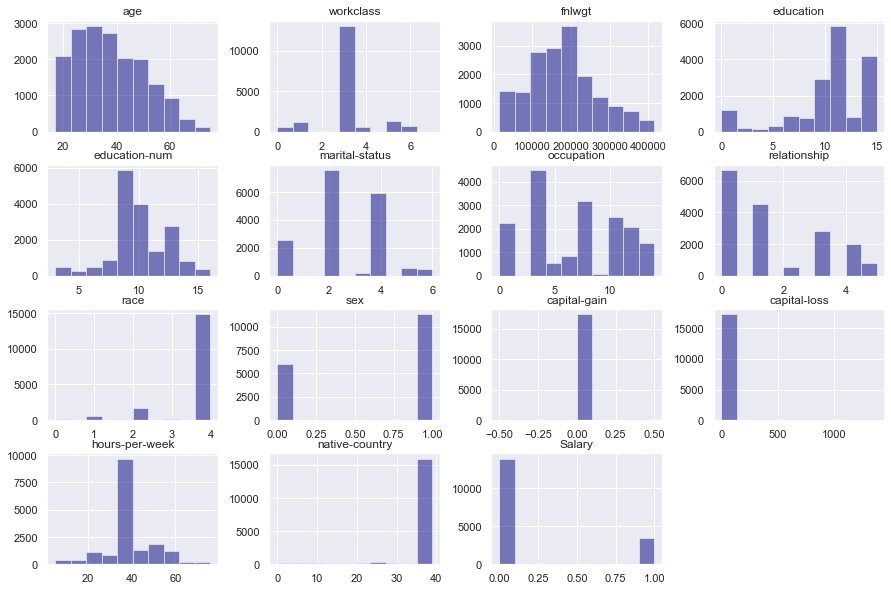

In [79]:
# histogram showing relations between the feature set of whole train_data
sns.set(style="darkgrid")
train_data.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

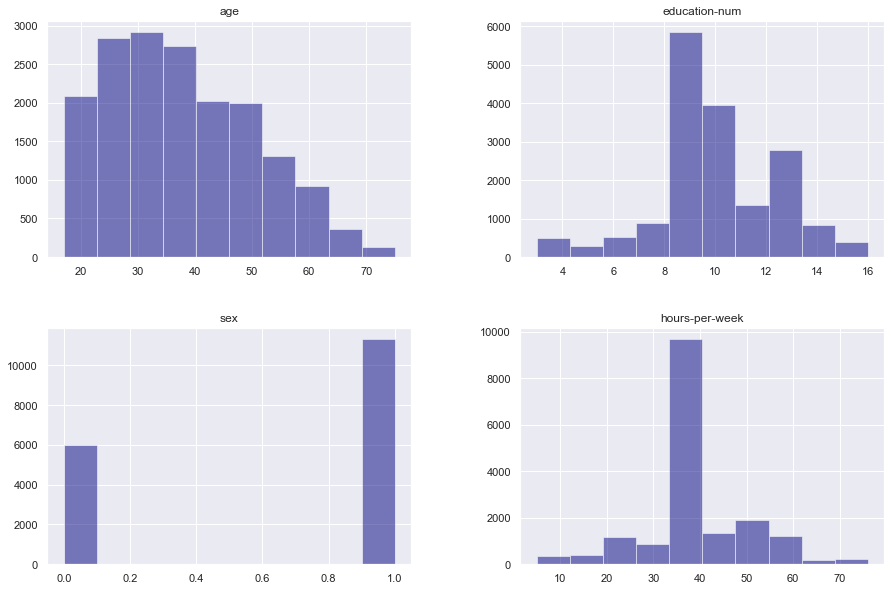

In [80]:
# histogram showing relations between the feature set of X_train
sns.set(style="darkgrid")
X_train.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

#  Measure of Central Tendency For Each Feature

In [81]:
# Normal distribution plot
def Normal_distribution(dataset):
    dataset = np.sort(dataset)
    mean = np.mean(dataset)
    std = np.std(dataset)
    # Normal Distribution 
    dataset_values = []
    for value in dataset:
        fx = (1/ (std*math.sqrt(2*np.pi))) * pow(2.71828, ((-1/2) * (((value - mean)/std)**2)))
        dataset_values.append(fx)
    plt.plot(dataset, dataset_values)
    plt.show()

For Feature  age


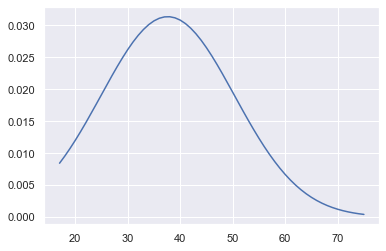

For Feature  education-num


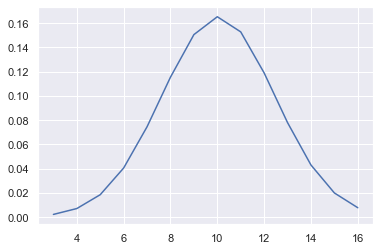

For Feature  sex


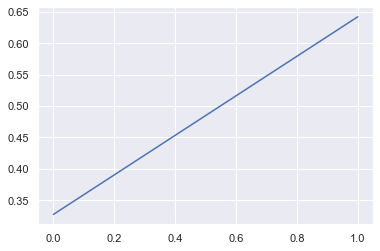

For Feature  hours-per-week


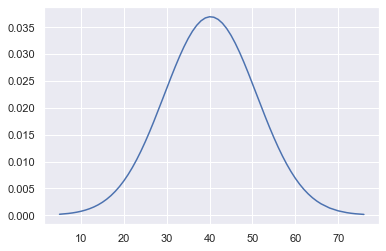

In [82]:
# Plotting Normal distribution for each feature in X_train
for ef in features:
    print("For Feature ", ef)
    Normal_distribution(X_train[ef])

# Dispersion (Standard Deviation And IQR) of Features

For Feature  age


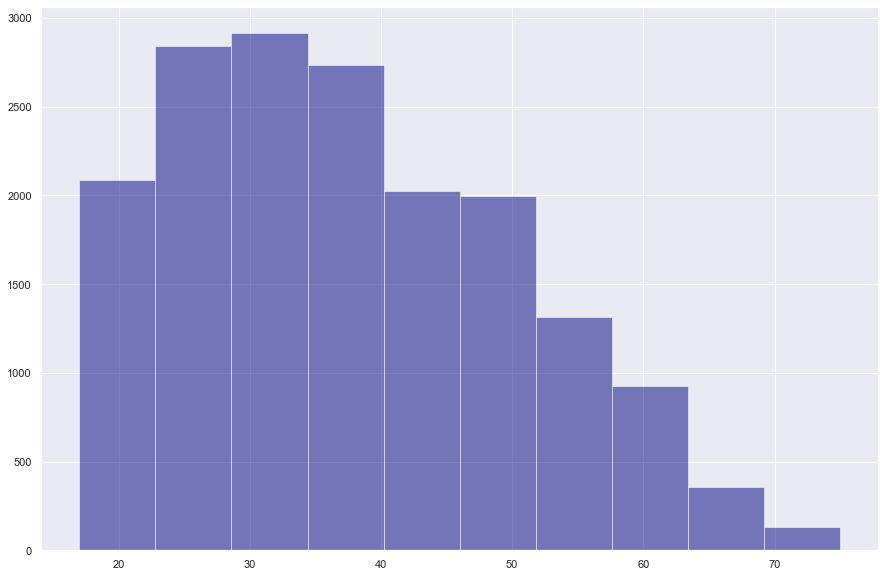

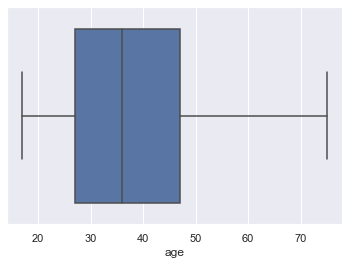

For Feature  education-num


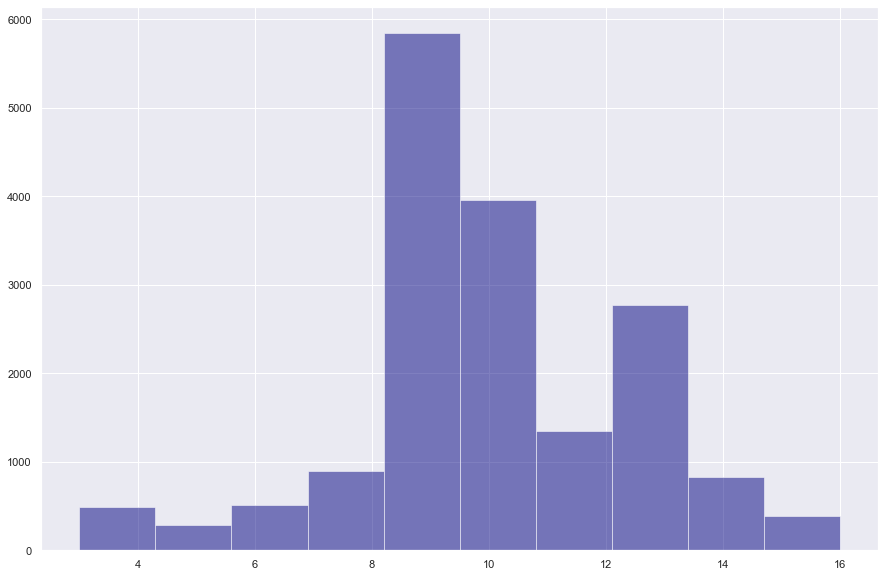

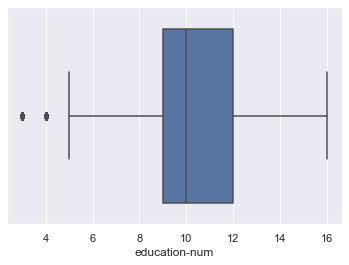

For Feature  sex


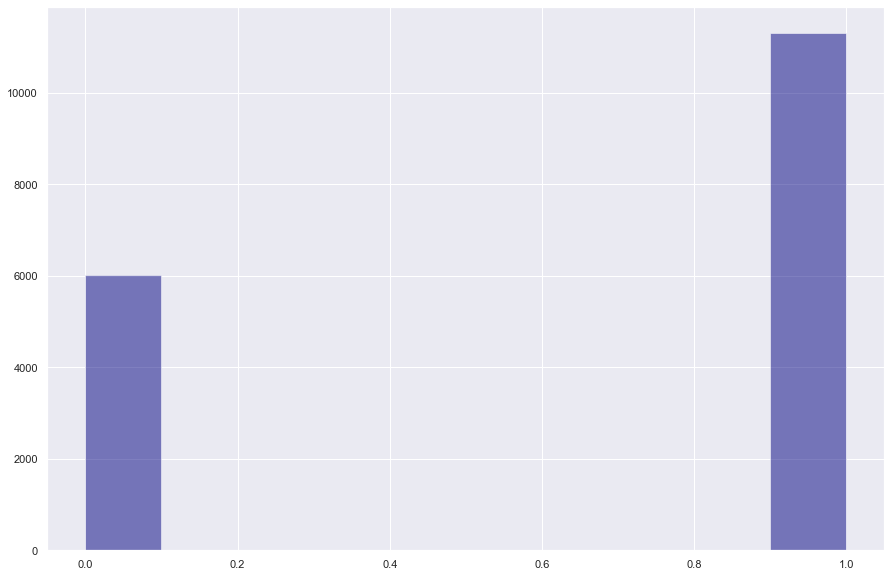

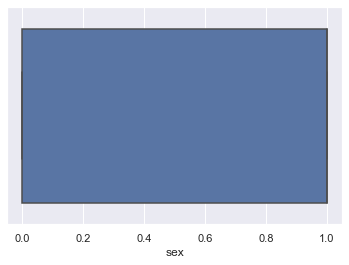

For Feature  hours-per-week


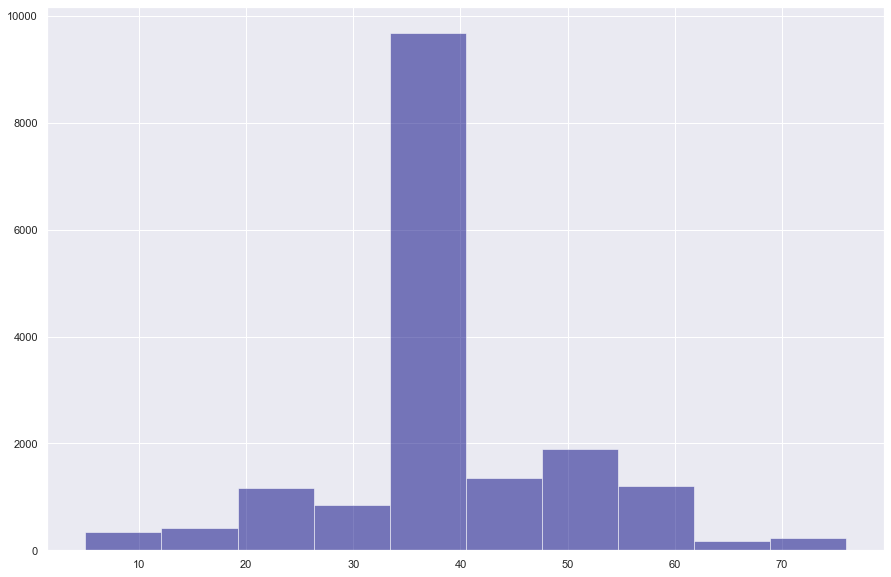

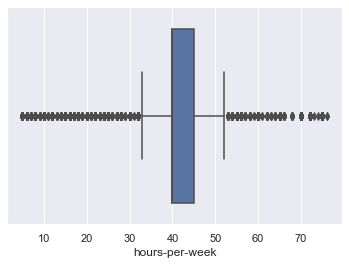

In [83]:
# Data Dispersion of each feature in X_train
for ef in features:
    print("For Feature ", ef)
    data_dispersion_visualization(X_train, ef)

# Data Normalization

In [84]:
# Data normalization
normalization_values = []
def normalization_data(train):
    min_value = min(train)
    max_value = max(train)
    normalization_values.append([min_value, max_value])
    
    new_data = []
    for ea in train:
        new_value = (ea - min_value)/(max_value - min_value)
        new_data.append(round(new_value, 2))
    return new_data

In [85]:
# Normalizing the dataset
for i in X_train.columns:
    X_train[i] = normalization_data(X_train[i])
# Dataset after normalization
X_train

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\4179921217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i] = normalization_data(X_train[i])


,age,education-num,sex,hours-per-week
2,0.64,0.62,1.0,0.49
3,0.53,0.85,0.0,0.66
5,0.78,0.54,0.0,0.15
6,0.22,0.62,0.0,0.42
7,0.21,0.08,0.0,0.49
...,...,...,...,...
21079,0.22,0.77,0.0,0.14
21080,0.34,0.77,1.0,0.63
21081,0.10,0.54,0.0,0.21
21082,0.55,0.54,0.0,0.49


# For Test Data

In [86]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
7353,42,Private,383493,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
5946,34,Local-gov,210164,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1740,40,United-States,0
12101,27,Private,214858,10th,6,Married-civ-spouse,Craft-repair,Other-relative,White,Male,0,0,55,United-States,0
20099,21,?,314645,Some-college,10,Never-married,?,Not-in-family,White,Female,0,0,43,United-States,0
486,63,?,401531,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28750,19,Private,369463,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0
9507,24,Private,113466,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,0
16865,51,Private,163948,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1
25733,26,Private,181920,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,45,United-States,1


In [87]:
# separating the dependent and independent variable as target and dataset
temp_features = features.copy()
temp_features.append('Salary')
temp_test_data = test_data[temp_features]

In [88]:
# checking for null or NaN values
null_values_count = list(temp_test_data.isnull().sum())
print(null_values_count)

[0, 0, 0, 0, 0]


In [89]:
# check unique values for every features
for i in temp_test_data.columns:
    print("For", i)
    print(temp_test_data[i].unique())

For age
[42 34 27 21 63 19 48 41 45 37 54 44 39 32 40 47 28 67 24 18 30 35 31 38
 59 49 50 23 36 22 71 72 69 26 46 20 81 57 56 17 29 51 25 62 52 55 43 33
 53 70 68 65 61 60 58 78 64 84 75 80 74 66 88 73 77 76 90 79 82 85 83]
For education-num
[14 10  6  2  9 13 12 11 16  8  7  3 15  4  5  1]
For sex
[' Male' ' Female']
For hours-per-week
[50 40 55 43 35 70 45 38 20 99 60 30 47 16  8 48 86 14 72 26 25 12 53 24
 10 36 37 32 42 65 52 75 41 15 44 56  3 85 80 39  9 17 28 18 11  4 22 84
 58 96 46 19 57 51 49 90 33  1 21  6 34 23  5  7 91 62  2 98 13 27 66 54
 31 29 64 67 63 97 78 89 81 59 73 77 68]
For Salary
[1 0]


In [90]:
def normalization_data2(test, values):
    min_value = values[0]
    max_value = values[1]    
    
    new_data = []
    for ea in test:
        new_value = (ea - min_value)/(max_value - min_value)
        new_data.append(round(new_value, 2))
    return new_data

In [91]:
y_test = temp_test_data['Salary']
X_test = temp_test_data[features]

In [92]:
X_test

,age,education-num,sex,hours-per-week
7353,42,14,Male,50
5946,34,10,Male,40
12101,27,6,Male,55
20099,21,10,Female,43
486,63,2,Male,35
...,...,...,...,...
28750,19,9,Female,40
9507,24,9,Male,40
16865,51,11,Male,40
25733,26,13,Female,45


In [93]:
# getting the categorical columns using their datatypes
categorical_columns2 = [X_test.columns[i] for i in range(len(X_test.dtypes)) if (X_test.dtypes[i]=='object')]

# setting up encoder for categorical columns
label_encoder = preprocessing.LabelEncoder()

In [94]:
# categorical to numerical converter
for cl in categorical_columns2:
    label_encoder.fit(X_test[cl])
    X_test[cl] = label_encoder.transform(X_test[cl])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\2205451459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cl] = label_encoder.transform(X_test[cl])


In [95]:
X_test

,age,education-num,sex,hours-per-week
7353,42,14,1,50
5946,34,10,1,40
12101,27,6,1,55
20099,21,10,0,43
486,63,2,1,35
...,...,...,...,...
28750,19,9,0,40
9507,24,9,1,40
16865,51,11,1,40
25733,26,13,0,45


In [96]:
count = 0
# Normalizing the dataset
for i in X_test.columns:
    X_test[i] = normalization_data2(X_test[i], normalization_values[count])
    count += 1
# Dataset after normalization
X_test

C:\Users\DELL\AppData\Local\Temp\ipykernel_15308\3715506268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i] = normalization_data2(X_test[i], normalization_values[count])


,age,education-num,sex,hours-per-week
7353,0.43,0.85,1.0,0.63
5946,0.29,0.54,1.0,0.49
12101,0.17,0.23,1.0,0.70
20099,0.07,0.54,0.0,0.54
486,0.79,-0.08,1.0,0.42
...,...,...,...,...
28750,0.03,0.46,0.0,0.49
9507,0.12,0.46,1.0,0.49
16865,0.59,0.62,1.0,0.49
25733,0.16,0.77,0.0,0.56


# Supervised Learning

In [97]:
# Model training
# Selecting Gaussian Naive Bayes Algorithm

def evaluate_model(X_test, y_test, y_pred):    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    
    print("Accuracy Score: %0.2f%%"%(acc*100))
    print("Confusion Matrix:\n", cm)    
    ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
    plt.show()
    print("Classification Report: \n", cr)

# Gaussian Naive Bayes Model From Scikit Learn
nb = GaussianNB()
# Training the model
nb.fit(X_train, y_train)

GaussianNB()

In [98]:
# predicted output of the training dataset
y_train_pred = nb.predict(X_train)
# predicted output of the test dataset
y_test_pred = nb.predict(X_test)

In [99]:
# train accuracy score
accuracy_score(y_train, y_train_pred)

0.826571247186472

In [100]:
# test accuracy score
accuracy_score(y_test, y_test_pred)

0.8083734261439247

Accuracy Score: 80.84%
Confusion Matrix:
 [[6964  498]
 [1374  933]]


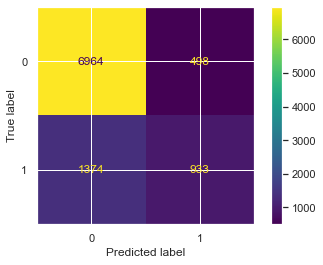

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7462
           1       0.65      0.40      0.50      2307

    accuracy                           0.81      9769
   macro avg       0.74      0.67      0.69      9769
weighted avg       0.79      0.81      0.79      9769



In [101]:
# Evaluation of the model
evaluate_model(X_test, y_test, y_test_pred)

# Unsupervised Learning

In [108]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [103]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
2,54,6,249096,8,11,2,11,0,4,1,0,0,40,37,0
3,48,1,39464,12,14,4,10,1,4,0,0,0,52,37,0
5,62,7,159908,15,10,2,1,5,4,0,0,0,16,37,0
6,30,3,217296,8,11,2,1,5,4,0,0,0,35,37,0
7,29,3,130045,5,4,2,8,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,30,1,233993,9,13,4,10,3,4,0,0,0,15,37,0
21080,37,3,65390,9,13,2,5,0,4,1,0,0,50,37,0
21081,23,3,161708,15,10,4,8,3,4,0,0,0,20,37,0
21082,49,5,162856,15,10,0,4,1,0,0,0,0,40,37,0


In [105]:
# feature selection 
X = train_data[features]
X

,age,education-num,sex,hours-per-week
2,54,11,1,40
3,48,14,0,52
5,62,10,0,16
6,30,11,0,35
7,29,4,0,40
...,...,...,...,...
21079,30,13,0,15
21080,37,13,1,50
21081,23,10,0,20
21082,49,10,0,40


# Building the clustering model and calculating the best number of clusters

In [109]:
# Building the clustering model and calculating the values of the Distortion and Inertia
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

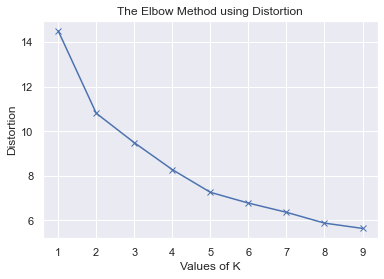

In [110]:
# Tabulating and Visualizing the results using the different values of Distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

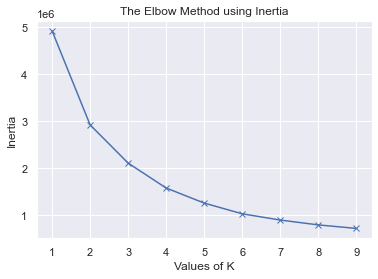

In [111]:
# Tabulating and Visualizing the results using the different values of inertias
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 2.